# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [0]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1. Get Data

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 2.7MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Read the dataset
link = 'https://drive.google.com/open?id=1jje-EQBSIp5FSsldVUfiQmH_3YcufwWx'
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('google-play-store.csv')  
df = pd.read_csv('google-play-store.csv')

In [6]:
df.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##2. Clean data

###2.1. Detect noises

In [0]:
import re
import math

# Strange value in Category
def isStrangeCategory(value):
  valid_range = list('ABCDEF')
  if re.fullmatch('[A-Z_]+', value):
    return False
  else:
    return True

# Strange value in Rating
def isStrangeRating(value):
  if 0 <= value <= 5 or math.isnan(value):
    return False
  else:
    return True
  
# Strange value in Reviews
def isStrangeReviews(value):
  if re.fullmatch('[0-9]+', value):
    return False
  else:
    return True

# Strange value in Size
def isStrangeSize(value):
  if re.fullmatch('[0-9]+\.?[0-9]*[kM]', value) or value == 'Varies with device':
    return False
  else:
    return True
  
# Strange value in Installs
def isStrangeInstalls(value):
  if re.fullmatch('([0-9]+,?)+\+', value):
    return False
  else:
    return True

# Strange value in Type
def isStrangeType(value):
  if re.fullmatch('Free|Paid', value):
    return False
  else:
    return True
  
# Strange value in Price
def isStrangePrice(value):
  if re.fullmatch('\$?[0-9]+\.?[0-9]*', value):
    return False
  else:
    return True
  
# Strange value in Genres
def isStrangeGenres(value):
  if re.search('[0-9]+', value):
    return True
  else:
    return False
  
# Strange value in Last Updated
def isStrangeLastUpdated(value):
  if re.fullmatch('[a-zA-z]+\s[0-9]{0,2}\,\s[0-9]{4}', value):
    return False
  else:
    return True
  
# Strange value in Current Ver
def isStrangeCurrentVer(value):
  if re.fullmatch('([0-9]\.?)+.*', value) or value == 'Varies with device':
    return False
  else:
    return True
  
# Strange value in Android Ver
def isStrangeAndroidVer(value):
  if re.fullmatch('([0-9]\.?)+.*', value) or value == 'Varies with device':
    return False
  else:
    return True  

In [9]:
# Detect strange data in column Category
df[df['Category'].apply(isStrangeCategory)]

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [10]:
# Detect strange data in column Rating
df[df['Rating'].apply(isStrangeRating)]

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [11]:
# Detect strange data in column Reviews
df[df['Reviews'].apply(isStrangeReviews)]

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [12]:
# Detect strange data in column Size
df[df['Size'].apply(isStrangeSize)]

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [13]:
# Detect strange data in column Installs
df[df['Installs'].apply(isStrangeInstalls)]

App  ...         Android Ver
9148                 Command & Conquer: Rivals  ...  Varies with device
10472  Life Made WI-Fi Touchscreen Photo Frame  ...                 NaN

[2 rows x 13 columns]

In [14]:
# Detect strange data in column Price
df[df['Price'].apply(isStrangePrice)]

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [15]:
# Detect strange data in column Genres
df[df['Genres'].apply(isStrangeGenres)]

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [16]:
# Detect strange data in column Last Updated
df[df['Last Updated'].apply(isStrangeLastUpdated)]

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [0]:
# Drop noise row
df.drop(index = [10472], inplace = True)

###2.2. Handle missing data

In [18]:
# Check NA values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [0]:
# Fill NA value in column Rating
value = df['Rating'].mean()
df['Rating'].fillna(value, inplace = True)

In [20]:
# Determine the row whose the Type column value is NA
df[df['Type'].isnull()]

App  ...         Android Ver
9148  Command & Conquer: Rivals  ...  Varies with device

[1 rows x 13 columns]

In [0]:
# Fill NA value in column Type
df['Type'].fillna('Free', inplace = True)

In [22]:
# Determine the rows whose the Current Ver column values or Android Ver values are NA
df[df['Current Ver'].isnull() | df['Android Ver'].isnull()]

App  ... Android Ver
15     Learn To Draw Kawaii Characters  ...  4.2 and up
1553              Market Update Helper  ...  1.5 and up
4453            [substratum] Vacuum: P  ...         NaN
4490              Pi Dark [substratum]  ...         NaN
6322            Virtual DJ Sound Mixer  ...  4.0 and up
6803                         BT Master  ...  1.6 and up
7333                       Dots puzzle  ...  4.0 and up
7407                   Calculate My IQ  ...  2.3 and up
7730                            UFO-CQ  ...  2.0 and up
10342                   La Fe de Jesus  ...  3.0 and up

[10 rows x 13 columns]

In [0]:
# Drop the rows whose the Current Ver values or Android Ver values are NA
df.dropna(subset = ['Current Ver', 'Android Ver'], inplace = True)

In [24]:
# Check NA values again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###2.3. Handle inconsistent data

In [0]:
# Convert KB to MB
def convertKBtoMB(size):
  if 'k' in size:
    size = size.rstrip('k')
    return str(float(size) / 1024) + 'M'
  else:
    return size

In [0]:
df['Size'] = df['Size'].apply(convertKBtoMB)

In [0]:
# Remove duplicated genres
def removeDuplicatedGenre(value):
  if ';' in value:
    lst1 = value.split(';')
    lst2 = list()
    for i in lst1:
      if i not in lst2:
        lst2.append(i)
    return ';'.join(lst2)
  else:
    return value

In [0]:
df['Genres'] = df['Genres'].apply(removeDuplicatedGenre)

###2.4. Data Transformation

In [0]:
# Convert data type of column Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors = 'coerce')

In [0]:
# Convert multiple-value attribute to single-value attributes
def getSingleGenre(genre):
  lst = list()
  for i in genre:
    if ';' in i: 
      token = i.split(';')
      for j in token:
        if j not in lst:
          lst.append(j)
    else:
      if i not in lst:
        lst.append(i)
  lst.sort()
  return lst

# Create a data frame of Genre
def createGenreDataFrame(df, genre):
  data = list()
  for i in df['Genres'].values.tolist():
    dic = dict.fromkeys(genre, 0)
    token = i.split(';')
    for j in token:
      dic[j] = 1.0
    data.append(dic)
  
  df2 = pd.DataFrame(data)
  return df2

In [0]:
genre = df['Genres'].unique().tolist()
genre = getSingleGenre(genre)
df2 = createGenreDataFrame(df, genre)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10830 entries, 0 to 10829
Data columns (total 53 columns):
Action                     10830 non-null float64
Action & Adventure         10830 non-null float64
Adventure                  10830 non-null float64
Arcade                     10830 non-null float64
Art & Design               10830 non-null float64
Auto & Vehicles            10830 non-null float64
Beauty                     10830 non-null float64
Board                      10830 non-null float64
Books & Reference          10830 non-null float64
Brain Games                10830 non-null float64
Business                   10830 non-null float64
Card                       10830 non-null float64
Casino                     10830 non-null float64
Casual                     10830 non-null float64
Comics                     10830 non-null float64
Communication              10830 non-null float64
Creativity                 10830 non-null float64
Dating                     10830 non-null

In [0]:
# Merge 2 dataframes
# df = pd.concat([df, df2], axis = 1)

In [0]:
# I was stuck in some troubles when trying to merge 2 dataframes. I decided to keep them independently.

In [0]:
df.drop(columns = 'Genres', inplace = True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 12 columns):
App               10830 non-null object
Category          10830 non-null object
Rating            10830 non-null float64
Reviews           10830 non-null int64
Size              10830 non-null object
Installs          10830 non-null object
Type              10830 non-null object
Price             10830 non-null object
Content Rating    10830 non-null object
Last Updated      10830 non-null object
Current Ver       10830 non-null object
Android Ver       10830 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 1.1+ MB


## 3. Save dataset as Google Sheet

In [35]:
!pip install --upgrade -q gspread # Install gspread package
!pip install gspread oauth2client

In [0]:
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe 

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #grant access to google drive 

In [0]:
def check_exists(path):
  # open the file. If exist return True
  # Your code here
  try:
    sh = gc.open(path)
    return True
  except:
    return False

In [0]:
def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
    if check_exists(path):
        print('create_new_worksheet(): File exists')
        return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
    sh.del_worksheet(sh.sheet1)
    return sh

In [0]:
sheets = {
    # Sheet name: column in this sheet
    'Google Play Store': df.columns.values.tolist()
}

In [0]:
sh = create_new_worksheet('Google Play Store', sheets)

In [42]:
sh.values_update(
  'Google Play Store!A2',
  params = {'valueInputOption': 'RAW'},
  body = {'values': df.values.tolist()}
)

{'spreadsheetId': '1XObpFYTokULl4S4lf3ziK-YUepqEbk4wTfQKqJ1a9AY',
 'updatedCells': 129960,
 'updatedColumns': 12,
 'updatedRange': "'Google Play Store'!A2:L10831",
 'updatedRows': 10830}

##4. Data Analysis

In [43]:
# The best applications
df[df['Rating'] == df['Rating'].max()]

App  ...   Android Ver
329                         Hojiboy Tojiboyev Life Hacks  ...  4.0.3 and up
612                        American Girls Mobile Numbers  ...  4.0.3 and up
615                                         Awake Dating  ...    4.4 and up
633                                Spine- The dating app  ...  4.0.3 and up
636           Girls Live Talk - Free Text and Video Chat  ...  4.0.3 and up
640                              Online Girls Chat Group  ...  4.0.3 and up
654                      Speeding Joyride & Car Meet App  ...    4.1 and up
1028                                    SUMMER SONIC app  ...    4.4 and up
1030                                          Prosperity  ...    2.0 and up
1038                           Mindvalley U Tallinn 2018  ...    4.4 and up
1547                                        Eternal life  ...    1.6 and up
2262            Super Hearing Secret Voices Recorder PRO  ...    4.1 and up
2271                                      FHR 5-Tier 2.0  ...    4.0 and up
2427                                        Sway Medical  ...    5.0 and up
2445                                      Labs on Demand  ...    4.2 and up
2448          Dermatology Atlas (Colored & Illustrative)  ...    4.1 and up
2450                                     Tablet Reminder  ...    4.1 and up
2452                                    Galaxies of Hope  ...    4.1 and up
2454                                 KBA-EZ Health Guide  ...  4.0.3 and up
2455                                        FoothillsVet  ...  4.0.3 and up
2457                                       PrimeDelivery  ...    4.1 and up
2458                                     You're an Anime  ...    5.0 and up
2459     Anatomy & Physiology Vocabulary Exam Review App  ...    4.0 and up
2472   NCLEX Multi-topic Nursing Exam Review-Quiz & n...  ...  4.0.3 and up
2477                              Basics of Orthopaedics  ...    4.1 and up
2484                                   Clinic Doctor EHr  ...    8.0 and up
2518                                        Sway Medical  ...    5.0 and up
2522                              420 BZ Budeze Delivery  ...    4.1 and up
2527                   BP Journal - Blood Pressure Diary  ...    4.4 and up
2533                                            Zen Leaf  ...    4.1 and up
...                                                  ...  ...           ...
9810                     ES Billing System (Offline App)  ...    4.1 and up
9815                                            ES Solar  ...    4.1 and up
9899                                        EU Exit poll  ...    4.1 and up
9911                                           daskal.eu  ...    4.4 and up
10166                               FA Player Essentials  ...  4.0.3 and up
10266                              Noticias FC Barcelona  ...    4.4 and up
10297                                      Story Time FD  ...    1.6 and up
10301  FD Calculator (EMI, SIP, RD & Loan Eligilibility)  ...    4.1 and up
10326                          Comunidad De Fe Minitries  ...    4.1 and up
10335                                      Safe Santa Fe  ...    4.0 and up
10349                                    Santa Fe Thrive  ...    4.1 and up
10357                                         Ríos de Fe  ...    4.1 and up
10407                          Jigsaw Volvo FH 16 Trucks  ...    4.0 and up
10416                                          FH School  ...  4.0.3 and up
10529                                 FK CLASSIC FOR YOU  ...    4.0 and up
10564                                     FK Dedinje BGD  ...    4.0 and up
10602                          South Florida AA Meetings  ...    4.1 and up
10609                         Trinity Church Deltona, FL  ...  2.3.3 and up
10611                         Beacon Baptist Jupiter, FL  ...  4.0.3 and up
10621                        Florida Beach Wallpapers HD  ...    4.1 and up
10629                                Florida Wildflowers  ...    4.1 and up
10656                    

In [44]:
#The worst applications
df[df['Rating'] == df['Rating'].min()]

App  ...   Android Ver
625                             House party - live chat  ...  4.0.3 and up
4127                                  Speech Therapy: F  ...  2.3.3 and up
5151                                      Clarksburg AH  ...  4.0.3 and up
5978                      Truck Driving Test Class 3 BC  ...    2.1 and up
6319                   BJ Bridge Standard American 2018  ...    4.0 and up
6490                                             MbH BM  ...    4.3 and up
7144                                      CB Mobile Biz  ...    4.0 and up
7383                                     Thistletown CI  ...    4.1 and up
7427                                     CJ DVD Rentals  ...    4.1 and up
7806                                        CR Magazine  ...  2.3.3 and up
7926                               Tech CU Card Manager  ...    4.0 and up
8820                                     DS Creator 2.0  ...    4.0 and up
8875                                     DT future1 cam  ...    2.2 and up
10324                    FE Mechanical Engineering Prep  ...    5.0 and up
10400           Familial Hypercholesterolaemia Handbook  ...    4.1 and up
10591  Lottery Ticket Checker - Florida Results & Lotto  ...    4.2 and up

[16 rows x 12 columns]

In [45]:
# Top 10 applications whose the numbers of reviews are highest
df.groupby('App').sum().nlargest(10, 'Reviews')['Reviews']

App
Instagram                                   266241989
WhatsApp Messenger                          207348304
Clash of Clans                              179558781
Messenger – Text and Video Chat for Free    169932272
Subway Surfers                              166331958
Candy Crush Saga                            156993136
Facebook                                    156286514
8 Ball Pool                                  99386198
Clash Royale                                 92530298
Snapchat                                     68045010
Name: Reviews, dtype: int64

In [46]:
# Top 5 application whose revenues are highest
df['Installs'] = df['Installs'].str.rstrip('+')
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

df['Price'] = df['Price'].str.lstrip('$')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

df['Revenue'] = df['Installs'] * df['Price']
df.groupby('App').sum().nlargest(5, 'Revenue')['Revenue']

App
Minecraft              139800000.0
I am rich               39999000.0
I Am Rich Premium       19999500.0
Facetune - For Free     17970000.0
Hitman Sniper            9900000.0
Name: Revenue, dtype: float64

In [53]:
# Total number of installs
df['Installs'].sum()

167631856377

In [47]:
# Most popular application
df.groupby('App').sum()['Installs'].sort_values(ascending = False).head(1)

App
Subway Surfers    6000000000
Name: Installs, dtype: int64

In [48]:
# Least popular application
df.groupby('App').sum()['Installs'].sort_values().head(1)

App
Test Application DT 02    0
Name: Installs, dtype: int64

In [49]:
# Top 5 categories which most applications belong to
df['Category'].value_counts().head()

FAMILY      1969
GAME        1144
TOOLS        841
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

In [50]:
# The category of applications which is most installed
df.groupby('Category').sum()['Installs'].sort_values(ascending = False).head(1)

Category
GAME    35086024415
Name: Installs, dtype: int64

In [51]:
# Top 10 most common genres
df2.sum().sort_values(ascending = False).head(10)

Tools              841.0
Education          710.0
Entertainment      666.0
Medical            463.0
Business           460.0
Productivity       424.0
Sports             402.0
Personalization    390.0
Communication      388.0
Lifestyle          383.0
dtype: float64

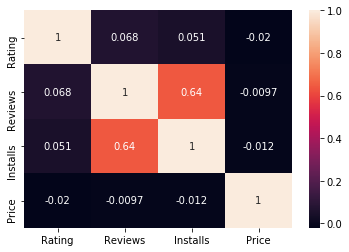

In [52]:
# The relationship between Rating, Reviews, Installs and Price
sns.heatmap(data = df[['Rating', 'Reviews', 'Installs', 'Price']].corr(), annot = True)